# DAEN 690 Capstone Project

## Import Libraries

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
import numpy as np

## Importing Dataset, Creating DataFrame, and Standardizing Data

### Caribou, Maine Dataset

In [2]:
#load Caribou, Maine
df = pd.read_csv("USM00072712-data.txt", sep = '\t', header = None)

In [3]:
#Raw Text File
df

,0
0,#USM00072712 2021 01 01 00 2303 178 ncdc-nws ...
1,21 0 99364B 191 -32B 680 51 295 ...
2,20 8 98805 236B -31B 594 68 296 ...
3,20 46 96285 440B -45B 612 63 296 ...
4,10 154 92500 754B -73B 663 52 298 ...
...,...
395232,20 9925 1210 29467B -559B 30 239 58 ...
395233,20 9938 1194 29553B -557B 29 241 54 ...
395234,20 9945 1186 29596B -556B 30 241 51 ...
395235,20 9952 1177 29643B -555B 30 240 58 ...


In [4]:
#Assigning columns
id_ = []
year = []
month = []
day = []
hour =[]
reltime = []
numlev = []
p_src = []
np_src = []
lat = []
lon = []

lvltyp1 = []
lvltyp2 = []
etime = []
press = []
pflag = []
gph = []
zflag = []
temp = []
tflag = []
rh = []
dpdp = []
wdir = []
wspd = []

for line in df[0]:
    if "USM00072712" in line:
        id_.append(line[0:12].strip())
        year.append(line[13:17].strip())
        month.append(line[17:20].strip())
        day.append(line[20:23])
        hour.append(line[23:26])
        reltime.append(line[27:31])
        numlev.append(line[33:36])
        p_src.append(line[37:45])
        np_src.append(line[46:54])
        lat.append(line[56:62])
        lon.append(line[64:71])
        lvltyp1.append(None)
        lvltyp2.append(None)
        etime.append(None)
        press.append(None)
        pflag.append(None)
        gph.append(None)
        zflag.append(None)
        temp.append(None)
        tflag.append(None)
        rh.append(None)
        dpdp.append(None)
        wdir.append(None)
        wspd.append(None)
    else:
        id_.append(None)
        year.append(None)
        month.append(None)
        day.append(None)
        hour.append(None)
        reltime.append(None)
        numlev.append(None)
        p_src.append(None)
        np_src.append(None)
        lat.append(None)
        lon.append(None)
        lvltyp1.append(line[0:1].strip())
        lvltyp2.append(line[1:2].strip())
        etime.append(line[4:8].strip())
        press.append(line[9:15].strip())
        pflag.append(line[15:16].strip())
        gph.append(line[17:21].strip())
        zflag.append(line[21:22].strip())
        temp.append(line[22:27].strip())
        tflag.append(line[27:28].strip())
        rh.append(line[28:33].strip())
        dpdp.append(line[33:39].strip())
        wdir.append(line[40:45].strip())
        wspd.append(line[46:51].strip())

In [5]:
#Creating DataFrame
maine_df = pd.DataFrame({
    'id_': id_,
    'year': year,
    'month': month,
    'day': day,
    'hour': hour,
    'reltime': reltime,
    'numlev': numlev,
    'p_src': p_src,
    'np_src': np_src,
    'lat': lat,
    'lon': lon,
    'lvltyp1': lvltyp1,
    'lvltyp2': lvltyp2,
    'etime': etime,
    'press': press,
    'pflag': pflag,
    'gph': gph,
    'zflag': zflag,
    'temp': temp,
    'tflag': tflag,
    'rh': rh,
    'dpdp': dpdp,
    'wdir': wdir,
    'wspd': wspd})

In [6]:
#Combining Headers with variables
maine_df['id_'].fillna(method = 'ffill', inplace = True)
maine_df['year'].fillna(method = 'ffill', inplace = True)
maine_df['month'].fillna(method = 'ffill', inplace = True)
maine_df['day'].fillna(method = 'ffill', inplace = True)
maine_df['hour'].fillna(method = 'ffill', inplace = True)
maine_df['reltime'].fillna(method = 'ffill', inplace = True)
maine_df['numlev'].fillna(method = 'ffill', inplace = True)
maine_df['p_src'].fillna(method = 'ffill', inplace = True)
maine_df['np_src'].fillna(method = 'ffill', inplace = True)
maine_df['lat'].fillna(method = 'ffill', inplace = True)
maine_df['lon'].fillna(method = 'ffill', inplace = True)

In [7]:
#Drop rows with null values
maine_df = maine_df.dropna()

In [8]:
#Upton data types
print(maine_df.dtypes)

id_        object
year       object
month      object
day        object
hour       object
reltime    object
numlev     object
p_src      object
np_src     object
lat        object
lon        object
lvltyp1    object
lvltyp2    object
etime      object
press      object
pflag      object
gph        object
zflag      object
temp       object
tflag      object
rh         object
dpdp       object
wdir       object
wspd       object
dtype: object


In [9]:
#Creating dictionary of data types
column_data_types = {
    'id_': str,
    'year': int,
    'month': int,
    'day': int,
    'hour': int,
    'reltime': int,
    'numlev': int,
    'p_src': str,
    'np_src': str,
    'lat': int,
    'lon': int,
    'lvltyp1': int,
    'lvltyp2': int,
    'etime': int,
    'press': int,
    'pflag': str,
    'gph': int,
    'zflag': str,
    'temp': int,
    'tflag': str,
    'rh': int,
    'dpdp': int,
    'wdir': int,
    'wspd': int
}

# Convert headers to the correct data type
maine_df = maine_df.astype(column_data_types)

In [10]:
#Upton DataFrame before calculations are added
maine_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,99364,B,191,,-32,B,680,51,295,36
2,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,98805,,236,B,-31,B,594,68,296,47
3,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,96285,,440,B,-45,B,612,63,296,96
4,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,92500,,754,B,-73,B,663,52,298,127
5,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,91875,,807,B,-78,B,676,49,299,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395232,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1210,,9467,B,-559,B,30,239,58,77
395233,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1194,,9553,B,-557,B,29,241,54,72
395234,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1186,,9596,B,-556,B,30,241,51,69
395235,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,1177,,9643,B,-555,B,30,240,58,64


### Gagetown, Canada Dataset

In [11]:
#Loading Gagetown, Canada Dataset
df2 = pd.read_csv("CAM00071701-data.txt", sep = '\t', header = None)

In [12]:
#Raw Text File
df2

,0
0,#CAM00071701 2021 01 26 12 1011 69 ncdc-gts ...
1,21 -9999 100800B-9999 -57B-9999 30 275 ...
2,10 -9999 100000 116B -63B-9999 19 285 ...
3,20 -9999 97700 -9999 -73B-9999 7 -9999 ...
4,20 -9999 94700 -9999 -39B-9999 10 -9999 ...
...,...
18003,30 -9999 -9999 4200 -9999 -9999 -9999 265 ...
18004,30 -9999 -9999 5100 -9999 -9999 -9999 275 ...
18005,30 -9999 -9999 5700 -9999 -9999 -9999 280 ...
18006,30 -9999 -9999 6000 -9999 -9999 -9999 280 ...


In [13]:
#Assigning columns
id_2 = []
year2 = []
month2 = []
day2 = []
hour2 =[]
reltime2 = []
numlev2 = []
p_src2 = []
np_src2 = []
lat2 = []
lon2 = []

lvltyp12 = []
lvltyp22 = []
etime2 = []
press2 = []
pflag2 = []
gph2 = []
zflag2 = []
temp2 = []
tflag2 = []
rh2 = []
dpdp2 = []
wdir2 = []
wspd2 = []

for line in df2[0]:
    if "CAM00071701" in line:
        id_2.append(line[0:12].strip())
        year2.append(line[13:17].strip())
        month2.append(line[17:20].strip())
        day2.append(line[20:23])
        hour2.append(line[23:26])
        reltime2.append(line[27:31])
        numlev2.append(line[33:36])
        p_src2.append(line[37:45])
        np_src2.append(line[46:54])
        lat2.append(line[56:62])
        lon2.append(line[64:71])
        lvltyp12.append(None)
        lvltyp22.append(None)
        etime2.append(None)
        press2.append(None)
        pflag2.append(None)
        gph2.append(None)
        zflag2.append(None)
        temp2.append(None)
        tflag2.append(None)
        rh2.append(None)
        dpdp2.append(None)
        wdir2.append(None)
        wspd2.append(None)
    else:
        id_2.append(None)
        year2.append(None)
        month2.append(None)
        day2.append(None)
        hour2.append(None)
        reltime2.append(None)
        numlev2.append(None)
        p_src2.append(None)
        np_src2.append(None)
        lat2.append(None)
        lon2.append(None)
        lvltyp12.append(line[0:1].strip())
        lvltyp22.append(line[1:2].strip())
        etime2.append(line[4:8].strip())
        press2.append(line[9:15].strip())
        pflag2.append(line[15:16].strip())
        gph2.append(line[17:21].strip())
        zflag2.append(line[21:22].strip())
        temp2.append(line[22:27].strip())
        tflag2.append(line[27:28].strip())
        rh2.append(line[28:33].strip())
        dpdp2.append(line[33:39].strip())
        wdir2.append(line[40:45].strip())
        wspd2.append(line[46:51].strip())

In [14]:
#Creating DataFrame
gagetown_df = pd.DataFrame({
    'id_': id_2,
    'year': year2,
    'month': month2,
    'day': day2,
    'hour': hour2,
    'reltime': reltime2,
    'numlev': numlev2,
    'p_src': p_src2,
    'np_src': np_src2,
    'lat': lat2,
    'lon': lon2,
    'lvltyp1': lvltyp12,
    'lvltyp2': lvltyp22,
    'etime': etime2,
    'press': press2,
    'pflag': pflag2,
    'gph': gph2,
    'zflag': zflag2,
    'temp': temp2,
    'tflag': tflag2,
    'rh': rh2,
    'dpdp': dpdp2,
    'wdir': wdir2,
    'wspd': wspd2})

In [15]:
#Combining Headers with variables
gagetown_df['id_'].fillna(method = 'ffill', inplace = True)
gagetown_df['year'].fillna(method = 'ffill', inplace = True)
gagetown_df['month'].fillna(method = 'ffill', inplace = True)
gagetown_df['day'].fillna(method = 'ffill', inplace = True)
gagetown_df['hour'].fillna(method = 'ffill', inplace = True)
gagetown_df['reltime'].fillna(method = 'ffill', inplace = True)
gagetown_df['numlev'].fillna(method = 'ffill', inplace = True)
gagetown_df['p_src'].fillna(method = 'ffill', inplace = True)
gagetown_df['np_src'].fillna(method = 'ffill', inplace = True)
gagetown_df['lat'].fillna(method = 'ffill', inplace = True)
gagetown_df['lon'].fillna(method = 'ffill', inplace = True)

In [16]:
#Drop rows with null values
gagetown_df = gagetown_df.dropna()

In [17]:
# Convert headers to the correct data type. References column_data_types dictionary that is defined above. 
gagetown_df = gagetown_df.astype(column_data_types)

In [18]:
#Albany DataFrame before calculations are added
gagetown_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,press,pflag,gph,zflag,temp,tflag,rh,dpdp,wdir,wspd
1,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,100800,B,9999,,-57,B,-9999,30,275,31
2,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,100000,,116,B,-63,B,-9999,19,285,46
3,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,97700,,9999,,-73,B,-9999,7,-9999,-9999
4,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,94700,,9999,,-39,B,-9999,10,-9999,-9999
5,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,93100,,9999,,-51,B,-9999,0,-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18003,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,4200,,-9999,,-9999,-9999,265,185
18004,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,5100,,-9999,,-9999,-9999,275,195
18005,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,5700,,-9999,,-9999,-9999,280,324
18006,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,-9999,,6000,,-9999,,-9999,-9999,280,340


## Preprocessing

## Functions

### Temperature converts to Fahrenheit

In [19]:
#May not need anymore due to the use of Pandas Vectorization which increases computational efficiency
def temp_to_fahrenheit(celcius_input):
    if celcius_input == -9999:
        return -9999
    elif celcius_input == -8888:
        return -8888
    else:
        return ((celcius_input/10)*(9/5)) + 32

### Temperature converts to Kelvin

In [20]:
#May not need anymore due to the use of Pandas Vectorization which increases computational efficiency
def temp_to_kelvin(celcius_input):
    if celcius_input == -9999:
        return -9999
    elif celcius_input == -8888:
        return -8888
    else:
        return (celcius_input/10) + 273.15

### Relative Humidity to Ice

Relative Humidity to Ice Equation
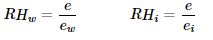
Saturation Water Vapor Pressure
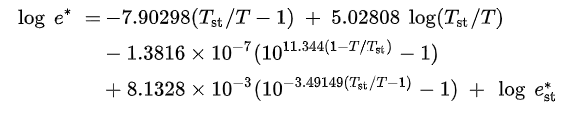
Saturation Water Vapor Pressure Over Ice
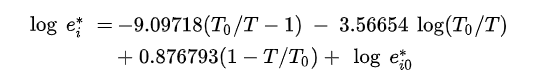

In [21]:
#Logic
#1. Create an empty array to store the rh_ice values
#2. If not a null value proceed
#3. Standardize relative humidity to a decimal value
#4. Calculate saturation water vapor pressure
#5. Calculate saturation water vapor pressure over ice
#6.Calculate actual vapor pressure
#7. Calculatew relative humidity to ice
#8. Return relative humidity to ice values

def relative_humidity_to_ice(temp_k, rh_w):
    
    # Initialize an empty array to store all calculations to be returned
    rh_ice = np.empty(len(temp_k))
    
    # Create a condition that if the value is not one of the following, the value is saved
    condition = (temp_k != -9999) & (temp_k != -8888) & (rh_w != -9999) & (rh_w != -8888)

    # Calculate rh_ice for non-null values
    t_non_null = temp_k[condition]
    #We divide first by 10 to standardize relative humidity (rh) to a percentage (ex: 11 = 1.1%). 
    #We than convert the percentage into a decimal value by dividing by 100. 
    rh_w_non_null = (rh_w[condition] / 10) / 100  
    
    # Ensure temperature is a non-zero number so we do not divide by 0. 
    t = t_non_null[t_non_null != 0]
    
    #Values needed for Goff-Gratch Equation
    t_st = 373.13 #steam-point temperature
    e_st = 1013.25 #steam-point pressure
    to = 273.16 #ice-point (triple point) temperature
    e_i0 = 6.1173 #ice-point pressure
    
    #Calculate log_ew (Saturation Water Vapor Pressure)
    log_ew = -7.90298 * (t_st / t - 1) + 5.02808 * np.log10(t_st / t) \
             - 1.3816e-7 * (10**(11.344 * (1 - t / t_st)) - 1) \
             + 8.1328e-3 * (10**(-3.49149 * (t_st / t - 1)) - 1) + np.log10(e_st)
    ew = np.exp(log_ew)
    
    #Calculate log_ei (Saturation Water Vapor Pressure Over Ice)
    log_ei = -9.09718 * (to / t - 1) - 3.56654 * np.log10(to / t) + 0.876793 * (1 - t / to) \
             + np.log10(e_i0)
    ei = np.exp(log_ei)

    #Calculate actual vapor pressure
    e_press = rh_w_non_null * ew
    
    #Calculcate relative humidity to ice
    rh_ice[condition] = e_press / ei
    
    #If value was -9999 or -8888, assigning -9999 value
    #~ denotes when the condition above is false and assigns them with -9999
    rh_ice[~condition] = -9999
    
    #Return all values calculated
    return rh_ice

### Pressure to Pressure Altitude

In [22]:
#May not need anymore due to the use of Pandas Vectorization which increases computational efficiency
def calculate_pressure_altitude(pressure):
    if pressure == -9999:
        return -9999    
    pressure /= 100

    pressure_altitude = (1 - (pressure / 1013.25) ** 0.190284) * 145366.45
    return round(pressure_altitude, 2)

### Capture When Temp below -42 Fahrenheit, RH above 100%, and pressure altitude below 43,000 feet

In [23]:
def issr(temp_f, rhi, press_alt):
    result = pd.Series('no', index = temp_f.index)
    
    result[(temp_f < -42) & (rhi > 1) & (press_alt < 43000)] = 'yes'
    
    return result

## Adding Conversions to DataFrames

### Filter to 2010-2024

In [24]:
#Filtering dataset to 2000-2024 data due to both datasets containing millions of rows
maine_df2 = maine_df[(maine_df['year'] >= 2010) & (maine_df['year'] <= 2024)]

### Adding Conversions to Upton DataFrame

In [25]:
#Fahrenheit
warnings.filterwarnings("ignore")
condition = (maine_df2['temp'] != -9999) & (maine_df2['temp'] != -8888)
maine_df2['temp_f'] = maine_df2['temp']
maine_df2.loc[condition, 'temp_f'] = maine_df2.loc[condition, 'temp_f'] /10 * (9/5) + 32

In [26]:
#Kelvins
warnings.filterwarnings("ignore")
condition2 = (maine_df2['temp'] != -9999) & (maine_df2['temp'] != -8888)
maine_df2['temp_k'] = maine_df2['temp']
maine_df2.loc[condition2, 'temp_k'] = maine_df2.loc[condition2, 'temp_k'] / 10 + 273.15

In [27]:
#Pressure Altitude
warnings.filterwarnings("ignore")
condition3 = (maine_df2['press'] != -9999) & (maine_df2['press'] != -8888)
maine_df2['press_alt'] = maine_df2['press'] / 100
maine_df2.loc[condition3, 'press_alt'] = round(((1 - (maine_df2.loc[condition3, 'press_alt'] / 1013.25) ** 0.190284) \
                                                * 145366.45), 2)

In [28]:
#Relative Humidity to Ice
warnings.filterwarnings("ignore")
maine_df2['rh_ice'] = relative_humidity_to_ice(maine_df2['temp_k'], maine_df2['rh'])
maine_df2['rh_ice'] = maine_df2['rh_ice'].round(3)

In [29]:
#ISSC
warnings.filterwarnings("ignore")
maine_df2['issc'] = issr(maine_df2['temp_f'], maine_df2['rh_ice'], maine_df2['press_alt'])

In [30]:
maine_df2

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
1,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,680,51,295,36,26.24,269.95,539.58,0.689,no
2,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,594,68,296,47,26.42,270.05,694.97,0.602,no
3,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,612,63,296,96,23.90,268.65,1404.45,0.624,no
4,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,663,52,298,127,18.86,265.85,2498.86,0.684,no
5,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,676,49,299,124,17.96,265.35,2683.05,0.699,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395232,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,B,30,239,58,77,-68.62,217.25,82768.35,0.038,no
395233,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,B,29,241,54,72,-68.26,217.45,82926.71,0.036,no
395234,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,B,30,241,51,69,-68.08,217.55,83006.53,0.038,no
395235,#USM00072712,2024,2,3,12,1103,321,ncdc-nws,,468683,...,B,30,240,58,64,-67.90,217.65,83096.86,0.038,no


In [31]:
#Number of times rh_ice was greater than 100%
maine_df2[(maine_df2['rh_ice'] > 1)]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
8,#USM00072712,2021,1,1,0,2303,178,ncdc-nws,ncdc-nws,468683,...,B,952,6,302,164,5.00,258.15,5537.84,1.014,no
600,#USM00072712,2021,1,2,12,1102,183,ncdc-nws,ncdc-nws,468683,...,B,950,6,248,216,1.40,256.15,15528.08,1.021,no
602,#USM00072712,2021,1,2,12,1102,183,ncdc-nws,ncdc-nws,468683,...,B,919,10,258,304,-5.08,252.55,18160.03,1.003,no
605,#USM00072712,2021,1,2,12,1102,183,ncdc-nws,ncdc-nws,468683,...,B,956,5,262,328,-16.42,246.25,20692.74,1.071,no
1121,#USM00072712,2021,1,4,0,2307,171,ncdc-nws,ncdc-nws,468683,...,B,966,4,150,60,14.00,263.15,2194.59,1.008,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384619,#USM00072712,2024,1,20,0,2311,297,ncdc-nws,ncdc-gts,468683,...,B,951,5,350,126,6.08,258.75,4779.19,1.011,no
384620,#USM00072712,2024,1,20,0,2311,297,ncdc-nws,ncdc-gts,468683,...,B,954,5,350,126,6.26,258.85,4799.97,1.014,no
384621,#USM00072712,2024,1,20,0,2311,297,ncdc-nws,ncdc-gts,468683,...,B,994,1,354,174,12.38,262.25,5243.83,1.041,no
384622,#USM00072712,2024,1,20,0,2311,297,ncdc-nws,ncdc-gts,468683,...,B,997,0,354,174,13.10,262.65,5287.91,1.042,no


In [32]:
#Number of times Upton has had ISSC in 2023
maine_df2[(maine_df2['issc'] == 'yes') & (maine_df2['year'] == 2023)]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
247618,#USM00072712,2023,2,17,15,1432,101,ncdc-nws,,468683,...,B,837,14,259,816,-62.50,220.65,33800.54,1.041,yes
247621,#USM00072712,2023,2,17,15,1432,101,ncdc-nws,,468683,...,B,838,13,261,875,-73.48,214.55,36201.96,1.065,yes
247730,#USM00072712,2023,2,17,18,1704,107,ncdc-nws,,468683,...,A,782,18,254,877,-79.06,211.45,37500.52,1.005,yes
267735,#USM00072712,2023,4,30,12,1103,237,ncdc-nws,ncdc-gts,468683,...,B,864,11,252,371,-68.26,217.45,33984.70,1.087,yes
267736,#USM00072712,2023,4,30,12,1103,237,ncdc-nws,ncdc-gts,468683,...,B,871,11,251,378,-68.80,217.15,34136.04,1.097,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342544,#USM00072712,2023,10,7,12,1102,207,ncdc-nws,ncdc-gts,468683,...,B,836,13,220,514,-80.68,210.55,40567.47,1.077,yes
342545,#USM00072712,2023,10,7,12,1102,207,ncdc-nws,ncdc-gts,468683,...,B,843,12,220,511,-81.40,210.15,40778.22,1.088,yes
342949,#USM00072712,2023,10,8,12,1101,199,ncdc-nws,ncdc-gts,468683,...,B,883,10,156,558,-63.76,219.95,37252.00,1.101,yes
342950,#USM00072712,2023,10,8,12,1101,199,ncdc-nws,ncdc-gts,468683,...,B,850,13,158,560,-64.66,219.45,37474.30,1.062,yes


In [33]:
maine_df2[(maine_df2['rh_ice'] == -9999) & (maine_df2['year'] == 2023)]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
241010,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,45,67,-9999.0,-9999.0,-99.99,-9999.0,no
241011,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,75,57,-9999.0,-9999.0,-99.99,-9999.0,no
241012,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,85,57,-9999.0,-9999.0,-99.99,-9999.0,no
241013,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,90,51,-9999.0,-9999.0,-99.99,-9999.0,no
241014,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,80,26,-9999.0,-9999.0,-99.99,-9999.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375855,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,75,21,-9999.0,-9999.0,-99.99,-9999.0,no
375856,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,90,41,-9999.0,-9999.0,-99.99,-9999.0,no
375857,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,100,31,-9999.0,-9999.0,-99.99,-9999.0,no
375858,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,45,15,-9999.0,-9999.0,-99.99,-9999.0,no


### Filter to 2010-2024

In [34]:
#Filtering dataset to 2000-2024 data due to both datasets containing millions of rows
gagetown_df2 = gagetown_df[(gagetown_df['year'] >= 2010) & (gagetown_df['year'] <= 2024)]

### Adding Conversions to Albany DataFrame

In [35]:
#Fahrenheit
warnings.filterwarnings("ignore")
condition = (gagetown_df2['temp'] != -9999) & (gagetown_df2['temp'] != -8888)
gagetown_df2['temp_f'] = gagetown_df2['temp']
gagetown_df2.loc[condition, 'temp_f'] = gagetown_df2.loc[condition, 'temp_f'] /10 * (9/5) + 32

In [36]:
#Kelvins
warnings.filterwarnings("ignore")
condition2 = (gagetown_df2['temp'] != -9999) & (gagetown_df2['temp'] != -8888)
gagetown_df2['temp_k'] = gagetown_df2['temp']
gagetown_df2.loc[condition2, 'temp_k'] = gagetown_df2.loc[condition2, 'temp_k'] / 10 + 273.15

In [37]:
#Pressure Altitude
warnings.filterwarnings("ignore")
condition3 = (gagetown_df2['press'] != -9999) & (gagetown_df2['press'] != -8888)
gagetown_df2['press_alt'] = gagetown_df2['press'] / 100
gagetown_df2.loc[condition3, 'press_alt'] = round(((1 - (gagetown_df2.loc[condition3, 'press_alt'] / 1013.25) ** 0.190284) \
                                                * 145366.45), 2)

In [38]:
#Relative Humidity to Ice
warnings.filterwarnings("ignore")
gagetown_df2['rh_ice'] = relative_humidity_to_ice(gagetown_df2['temp_k'], gagetown_df2['rh'])
gagetown_df2['rh_ice'] = gagetown_df2['rh_ice'].round(3)

In [39]:
#Ice-Supersaturated Conditions
warnings.filterwarnings("ignore")
gagetown_df2['issc'] = issr(gagetown_df2['temp_f'], gagetown_df2['rh_ice'], gagetown_df2['press_alt'])

In [40]:
gagetown_df2

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
1,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,B,-9999,30,275,31,21.74,267.45,143.62,-9999.0,no
2,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,B,-9999,19,285,46,20.66,266.85,363.64,-9999.0,no
3,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,B,-9999,7,-9999,-9999,18.86,265.85,1004.25,-9999.0,no
4,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,B,-9999,10,-9999,-9999,24.98,269.25,1858.43,-9999.0,no
5,#CAM00071701,2021,1,26,12,1011,69,ncdc-gts,ncdc-gts,458333,...,B,-9999,0,-9999,-9999,22.82,268.05,2322.98,-9999.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18003,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,265,185,-9999.00,-9999.00,-99.99,-9999.0,no
18004,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,275,195,-9999.00,-9999.00,-99.99,-9999.0,no
18005,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,280,324,-9999.00,-9999.00,-99.99,-9999.0,no
18006,#CAM00071701,2024,1,25,6,520,47,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,280,340,-9999.00,-9999.00,-99.99,-9999.0,no


In [41]:
#Number of occurences that rh_ice is over 100%
gagetown_df2[(gagetown_df2['rh_ice'] > 1)]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc


In [42]:
#Number of occurences Albany experiences ISSC in 2023
gagetown_df2[(gagetown_df2['issc'] == 'yes') & (gagetown_df2['year'] == 2023)]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc


In [43]:
gagetown_df2[(gagetown_df2['rh_ice'] == -9999) & (gagetown_df2['year'] == 2023)]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
17106,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,12,40,72,30.74,272.45,225.96,-9999.0,no
17107,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,14,40,82,29.66,271.85,363.64,-9999.0,no
17108,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,0,-9999,-9999,23.54,268.45,2089.90,-9999.0,no
17109,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,3,60,314,24.26,268.85,2498.86,-9999.0,no
17110,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,0,-9999,-9999,23.90,268.65,2883.12,-9999.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17950,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,215,180,-9999.00,-9999.00,-99.99,-9999.0,no
17951,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,220,211,-9999.00,-9999.00,-99.99,-9999.0,no
17952,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,250,201,-9999.00,-9999.00,-99.99,-9999.0,no
17953,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,240,216,-9999.00,-9999.00,-99.99,-9999.0,no


## Filter Dataset (Data from 2023 AND Pressure Altitude Under 43,000)

In [44]:
#Filter and create new DataFrame. New U.S. DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
new_maine_df = maine_df2[(maine_df2['year'] == 2023) & (maine_df2['press_alt'] <= 43000)]

In [45]:
#Filter and create new DataFrame. New Canada DataFrame is all data that is in the year 2023 and 
#pressure altitude is under 4,300 ft.
new_gagetown_df = gagetown_df2[(gagetown_df2['year'] == 2023) & (gagetown_df2['press_alt'] <= 43000)]

## Finalized Cleaned Datasets for Analysis

In [46]:
new_maine_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
240922,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,970,4,6,26,40.46,277.85,999.75,0.951,no
240923,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,927,11,49,83,40.82,278.05,1499.89,0.908,no
240924,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,963,5,52,83,41.36,278.35,1580.73,0.942,no
240925,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,1000,0,60,82,41.36,278.35,1819.52,0.978,no
240926,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,B,968,5,76,57,40.46,277.85,2374.19,0.949,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375855,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,75,21,-9999.00,-9999.00,-99.99,-9999.000,no
375856,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,90,41,-9999.00,-9999.00,-99.99,-9999.000,no
375857,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,100,31,-9999.00,-9999.00,-99.99,-9999.000,no
375858,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,45,15,-9999.00,-9999.00,-99.99,-9999.000,no


In [47]:
new_maine_df[new_maine_df['rh_ice'] == -9999]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
241010,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,45,67,-9999.0,-9999.0,-99.99,-9999.0,no
241011,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,75,57,-9999.0,-9999.0,-99.99,-9999.0,no
241012,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,85,57,-9999.0,-9999.0,-99.99,-9999.0,no
241013,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,90,51,-9999.0,-9999.0,-99.99,-9999.0,no
241014,#USM00072712,2023,1,1,12,1103,132,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,80,26,-9999.0,-9999.0,-99.99,-9999.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375855,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,75,21,-9999.0,-9999.0,-99.99,-9999.0,no
375856,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,90,41,-9999.0,-9999.0,-99.99,-9999.0,no
375857,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,100,31,-9999.0,-9999.0,-99.99,-9999.0,no
375858,#USM00072712,2023,12,31,12,1102,192,ncdc-nws,ncdc-gts,468683,...,,-9999,-9999,45,15,-9999.0,-9999.0,-99.99,-9999.0,no


In [48]:
new_maine_df[new_maine_df['issc'] == 'yes']

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
247618,#USM00072712,2023,2,17,15,1432,101,ncdc-nws,,468683,...,B,837,14,259,816,-62.50,220.65,33800.54,1.041,yes
247621,#USM00072712,2023,2,17,15,1432,101,ncdc-nws,,468683,...,B,838,13,261,875,-73.48,214.55,36201.96,1.065,yes
247730,#USM00072712,2023,2,17,18,1704,107,ncdc-nws,,468683,...,A,782,18,254,877,-79.06,211.45,37500.52,1.005,yes
267735,#USM00072712,2023,4,30,12,1103,237,ncdc-nws,ncdc-gts,468683,...,B,864,11,252,371,-68.26,217.45,33984.70,1.087,yes
267736,#USM00072712,2023,4,30,12,1103,237,ncdc-nws,ncdc-gts,468683,...,B,871,11,251,378,-68.80,217.15,34136.04,1.097,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342544,#USM00072712,2023,10,7,12,1102,207,ncdc-nws,ncdc-gts,468683,...,B,836,13,220,514,-80.68,210.55,40567.47,1.077,yes
342545,#USM00072712,2023,10,7,12,1102,207,ncdc-nws,ncdc-gts,468683,...,B,843,12,220,511,-81.40,210.15,40778.22,1.088,yes
342949,#USM00072712,2023,10,8,12,1101,199,ncdc-nws,ncdc-gts,468683,...,B,883,10,156,558,-63.76,219.95,37252.00,1.101,yes
342950,#USM00072712,2023,10,8,12,1101,199,ncdc-nws,ncdc-gts,468683,...,B,850,13,158,560,-64.66,219.45,37474.30,1.062,yes


In [49]:
new_gagetown_df

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
17106,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,12,40,72,30.74,272.45,225.96,-9999.0,no
17107,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,14,40,82,29.66,271.85,363.64,-9999.0,no
17108,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,0,-9999,-9999,23.54,268.45,2089.90,-9999.0,no
17109,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,3,60,314,24.26,268.85,2498.86,-9999.0,no
17110,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,0,-9999,-9999,23.90,268.65,2883.12,-9999.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17950,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,215,180,-9999.00,-9999.00,-99.99,-9999.0,no
17951,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,220,211,-9999.00,-9999.00,-99.99,-9999.0,no
17952,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,250,201,-9999.00,-9999.00,-99.99,-9999.0,no
17953,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,240,216,-9999.00,-9999.00,-99.99,-9999.0,no


In [50]:
new_gagetown_df[new_gagetown_df['rh_ice'] == -9999]

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc
17106,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,12,40,72,30.74,272.45,225.96,-9999.0,no
17107,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,14,40,82,29.66,271.85,363.64,-9999.0,no
17108,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,0,-9999,-9999,23.54,268.45,2089.90,-9999.0,no
17109,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,3,60,314,24.26,268.85,2498.86,-9999.0,no
17110,#CAM00071701,2023,1,16,14,1334,78,ncdc-gts,ncdc-gts,458333,...,A,-9999,0,-9999,-9999,23.90,268.65,2883.12,-9999.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17950,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,215,180,-9999.00,-9999.00,-99.99,-9999.0,no
17951,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,220,211,-9999.00,-9999.00,-99.99,-9999.0,no
17952,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,250,201,-9999.00,-9999.00,-99.99,-9999.0,no
17953,#CAM00071701,2023,12,29,18,1737,70,ncdc-gts,ncdc-gts,458333,...,,-9999,-9999,240,216,-9999.00,-9999.00,-99.99,-9999.0,no


In [51]:
new_gagetown_df[new_gagetown_df['issc'] == 'yes']

,id_,year,month,day,hour,reltime,numlev,p_src,np_src,lat,...,tflag,rh,dpdp,wdir,wspd,temp_f,temp_k,press_alt,rh_ice,issc


## ISS Conditions Exploratory Data Analysis

[Text(0.5, 1.0, 'Caribou Maine ISS-Likely Regions')]

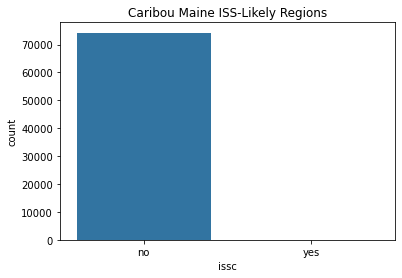

In [52]:
sns.countplot(x = 'issc', data = new_maine_df).set(title = 'Caribou Maine ISS-Likely Regions')

[Text(0.5, 1.0, 'Albany, NY ISS-Likely Regions')]

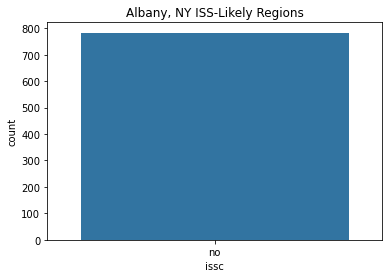

In [53]:
sns.countplot(x = 'issc', data = new_gagetown_df).set(title = 'Albany, NY ISS-Likely Regions')

### ISS Conditions were present in the region X% of days a month

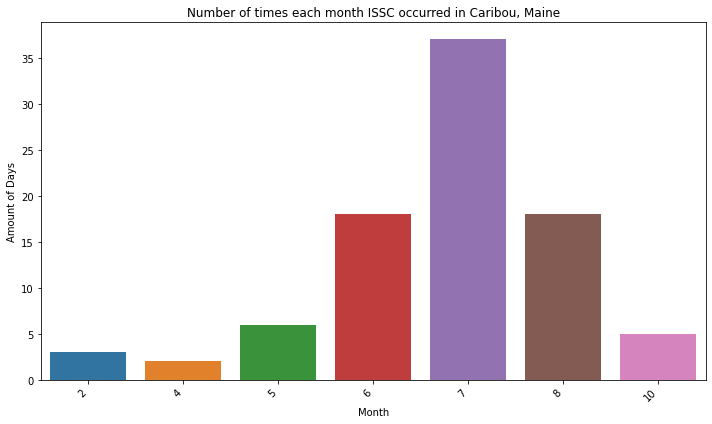

In [54]:
#Capture all days ISSC occurred
issc_yes = new_maine_df[new_maine_df['issc'] == "yes"]

#Groupby Month
df_counts = issc_yes.groupby('month').size()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x = df_counts.index, y = df_counts.values)
plt.xticks(rotation=45, ha='right')
plt.title('Number of times each month ISSC occurred in Caribou, Maine')
plt.xlabel('Month')
plt.ylabel('Amount of Days')
plt.tight_layout()
plt.show()

In [55]:
new_maine_df.to_csv('caribou_maine_issr.csv', index = False)